In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The aim of this project is to analyze frquently used positive and negative words in youtube. For this, a collection of data, which is already cleaned,  is gathered from a particular source and analysis is performed on that data. Some of the rows in this data set were corrupt and those lines are ignored using the second argument(error_bad_lines = False). Then, remaining dataset is imported.

In [2]:
videos = pd.read_csv("UScomments.csv",error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\chira\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
videos.head(5)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

#  Analysing Data

For the purpose of analysing the text based data, "textblob" is used. This particular module is useful for text-based data analysis. A class from textblob ,"TextBlob" has a method "sentiment" which analyze the sentiment of any sentence to find if that is positive or negative.

Then "polarity" method returns polarity if the sentiment. The return value is between -1 and +1 where -1 signifies completly negative word , 0 signifies somewhat neutral sentence and +1 signifies positive sentence. 

In the cell below, the said module is imported and each element form column "comment_text" from the dataset "UScomments.csv" is ran passed for sentiment analysis. Then, their polarity value is added in the data set.

In [4]:
from textblob import TextBlob

Executing the cell below may take a minute or two

In [5]:
polarity=[]
for i in videos["comment_text"]:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [6]:
videos["polarity"] = polarity


Now, The comments with polarity "1" is picked from our dataset and analysis is performed. For this, wordcloud, a python module to create wordcloud, is used. This module automatically sorts the frequently used words and make a wordcloud out of that.

In [7]:
positive_comments = videos[videos["polarity"] == 1]

"!pip install wordcloud" Run this if you are having trouble displaying image.

In [8]:
from wordcloud import WordCloud, STOPWORDS

Now, all positive comments are joined and wordcloud is generated form those comments.

In [9]:
total_positive_comments = " ".join(positive_comments["comment_text"])
len(total_positive_comments)
stopword = set(STOPWORDS)

Finally, the height and width of word cloud is defined and matplotlib is used to display that wordcloud.

(-0.5, 999.5, 499.5, -0.5)

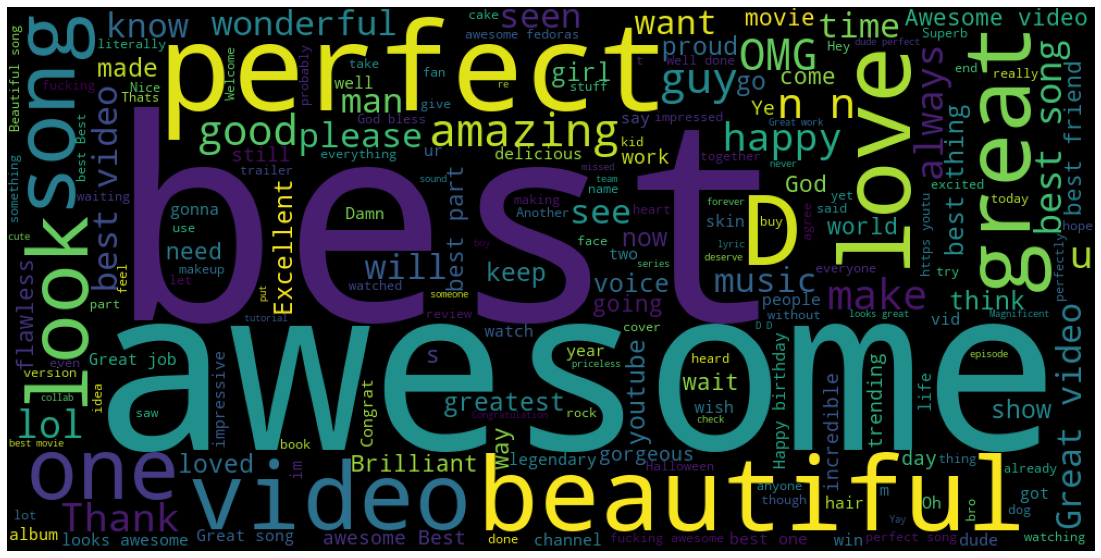

In [10]:
cloud = WordCloud(width=1000, height=500, stopwords=stopword).generate(total_positive_comments)
plt.figure(figsize=(20,10))
plt.imshow(cloud)
plt.axis("off")

We can see thar "best" and "awesome" are some of the most used positive words in youtube. Although, since the data was gathered from certain youtube channels, making a general assumption for overall youtube contents is not plausible.

Same Process is repeated for negative comments with polarity -1.

In [11]:
neg_comments = videos[videos.polarity == -1]
neg_comments.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [12]:
neg_reviews = neg_comments.comment_text
neg_review = " ".join(neg_reviews)

(-0.5, 999.5, 499.5, -0.5)

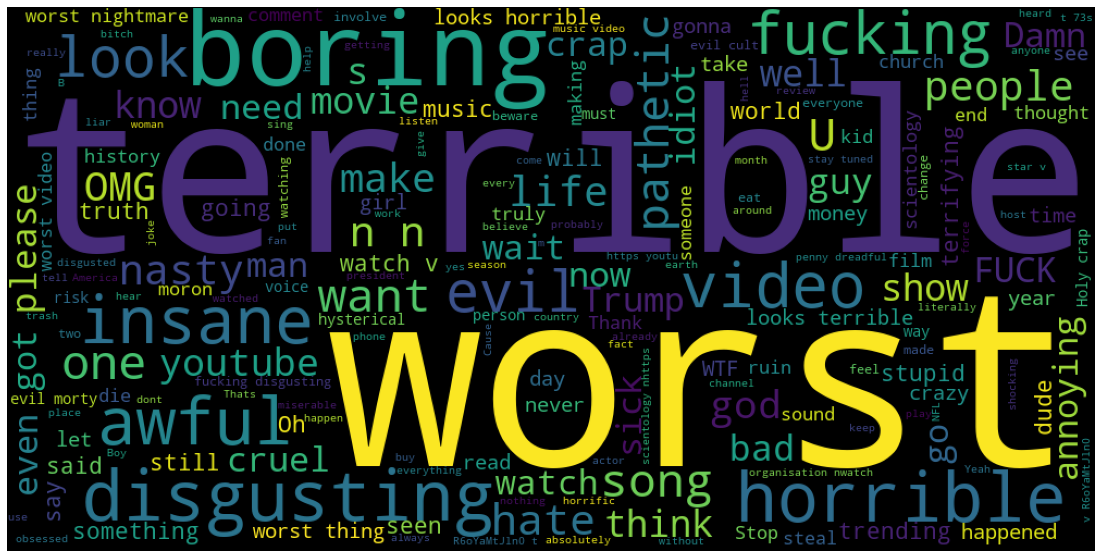

In [13]:
cloud1 = WordCloud(width=1000, height=500, stopwords=stopword).generate(neg_review)
plt.figure(figsize=(20,10))
plt.imshow(cloud1)
plt.axis("off")

On the otherhand, "terrible" and "Worst" are among the most used negative words in these youtube channels.

# Part 2: Tag and Trend analysis 

In this section, the tags and trends on youtube are analysed. To analyze tag, "USVideso.csv" is imported which contains information about tags ,likes, dislikes , views, etc of many popular videos of youtube. 

In [14]:
videos2 = pd.read_csv("USvideos.csv",error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [15]:
videos2.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

Firstly, all contents of tag collumn if our data is joined by " ". On doing so, we notice some special symbols(|) between words. This symbol may harm accuracy of our prediction which is the data needs to be cleaned. For this Regular Expression(re) is used.

In [16]:
tags = " ".join(videos2.tags)

In [17]:
videos2["tags"][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [18]:
import re

Now, using Re's sub(substitite) method, we replace all the characters except alphabets with space. On doing so, existsing space between words are increased and to counter that, all excess space are removed using regular expression.

In [19]:
tags = re.sub("[^a-zA-Z ]"," ",tags)

In [20]:
tags = re.sub(" +", " ", tags)

Again, WordCloud is used which analyzes frequently used tags and creates a wordcloud.

(-0.5, 999.5, 499.5, -0.5)

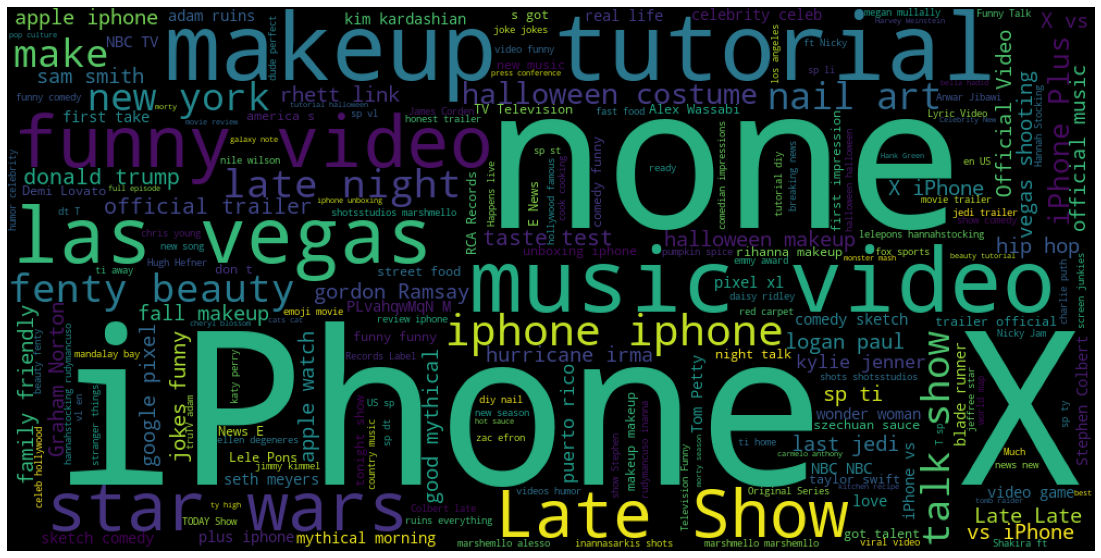

In [21]:
cloud2 = WordCloud(width=1000, height=500, stopwords=stopword).generate(tags)
plt.figure(figsize=(20,10))
plt.imshow(cloud2)
plt.axis("off")

# Analysis on Like, Dislike & Views

In this section, the likes, dislikes and views are analyzed. For the analysis, Seaborn is used.

Text(0.5, 1.0, 'Regression plot of Likes and Views')

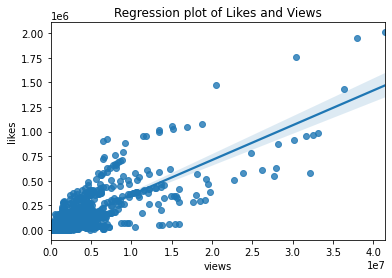

In [22]:
sns.regplot(x="views", y="likes",data=videos2)
plt.title("Regression plot of Likes and Views")

In the graph above, we can see a linear growth on likes and views. Looking at the graph above, we can conclude that like will increase with increase in views on the videos.

In [23]:
sns.regplot(x="views",y="dislikes",data=videos2)
plt.title("Regression Plot of Dislikes and Views")

Text(0.5, 1.0, 'Regression Plot of Dislikes and Views')

Same analysis is performed in this part where dislikes and views are compared. We can notice somewhat growing trend here but their relation is not as clear as relation of views and likes. There are some videos here which have high dislikes wven with lesser views and less dislikes even with millions of views.

Here, we can conclude that number of likes in a video is likely to grow with views but number of dislikes is relatively uncertain. To validate this statement, a heatmapis drawn which looks closely at the corelation of views, likes and dislikes of videos.

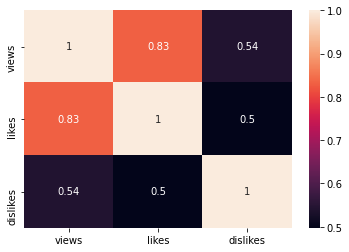

In [24]:
df_corr = videos2[["views","likes","dislikes"]]
sns.heatmap(df_corr.corr(),annot=True)

Here, we can see that likes and views are highly corelated where as views and dislikes are somewhat less corelated. This validates our previous statement.

# Section 3: Emoji Analysis

In this section, we will collect emojis from youtube's comment section and try to analyze them to determine user's mood. For this, we will use "emoji" library of python.

In [25]:
!pip install emoji
import emoji

First, we will check for null values in comment. Null values can pollute our data set. Normally, for numerical data, certain values would have been assigned for null values but since we are deling with textul data, that is not possible. Here, the rows with null values are dropped. 

In [26]:
videos[videos["comment_text"].isna()]

video_id comment_text likes replies  polarity
76134   7YAAyUFL1GQ          NaN     0       0       0.0
215218  KUCHBBCj77I          NaN     0       0       0.0
234226  KUCHBBCj77I          NaN     0       0       0.0
306019  s3Hk_lDw5yo          NaN     0       0       0.0
332811  zrOHeEA14kQ          NaN     0       0       0.0
357506  zmg9tVaMVd4          NaN     0       0       0.0
379582  zmg9tVaMVd4          NaN     0       0       0.0
403013  9eea7_7OBZQ          NaN     0       0       0.0
425238  6l5P7jHUcjI          NaN     0       0       0.0
436348  IQisUbBljW0          NaN     0       0       0.0
444629  6l5P7jHUcjI          NaN     0       0       0.0
462907  6l5P7jHUcjI          NaN     0       0       0.0
467339  rJTkHGXMdb0          NaN     0       0       0.0
483367  6l5P7jHUcjI          NaN     0       0       0.0
516431  941Bl3oxk8Y          NaN     0       0       0.0
543886  8I1B4n_8Cto          NaN     0       0       0.0
545600  CX4KuIBmnjI          NaN     0       0       0.0
558328  8I1B4n_8Cto          NaN     0       0       0.0
560121  ZczwzVhai9E          NaN     0       0       0.0
563768  CX4KuIBmnjI          NaN     0       0       0.0
573796  Iv2lWZxzUj8          NaN     0       0       0.0
584612  CX4KuIBmnjI          NaN     0       0       0.0
605039  CX4KuIBmnjI          NaN     0       0       0.0
615625  5qlSfNVp3fU          NaN     0       0       0.0
637282  5qlSfNVp3fU          NaN     0       0       0.0

In [27]:
videos["comment_text"].dropna(inplace=True)

In [28]:
videos.shape

(691400, 5)

Now, we will proceed with extraction of emojis from our text. Since every emoji has unique unicode associated with it, we will use those unicode to identify and extract emojis from our text. For this, "UNICODE_EMOJI" class of emoji module is used. Then all the emojis are placed in list and they are further cleaned for analysis.

In [29]:
str = ""
for i in videos["comment_text"]:
    list = [c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str = str+ele


In [41]:
str[:1000]

'‼‼‼😉😭👍🏻❤😍💋💙👍👈😂🔥😂😂😂😂👻❤😂❤💎😆😆😆😆😆😆😁😁😁😁😁😁😁😂😂😂😂😭😒👏👏👏👏👏👏👏👏👏👏😊❤👈😂😂👌👌🤔👈😂😂😁💔😂👎👎👎👎👎🍎😤😂😂😂😂👈😭😭😭😢😢😢😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂💋💋👫💘😻💋💋💖💖💖💖💖💖💖💖💖💖💖💖💖💖🌟🌟😮😮😮😮😮😮😮😮😮👈😊👇🏻😳😳❤👈😠😆😂😆😂😆😊😠😴😴😴😴👈🤔😂😝😂😂😂👍😂™👈☺😔😩😩😡😍😍😍😍😍😍😂🙏🏻😄☺😬😊👍🏻😊☹🤷🤣🤣🤣🤣😃😃😃😃👌🏽🍏🍎😓😂😂🤣🤣❤❤😂🤦🏽♀😞😂🙏🏼😂😂😂✌😂😂😂😂😂😂😂😂😂😂😊😂😂😂😂😂😂😔😂😂😂😂😭😭😭😭💀😂😂👀😂😂😂😱❤😂😂😂😂😂😂😂😂😂❤❤👑👑👑😂😂😍😍😍🌮🌮🌮🌮🌮😂😀😂😂😂😂😂😂😂💆🏿♂🔥👏👏👏😊😅😆😆😆😆😂😂😂😂😂😂🌟🌟😮😮😮😮😮😮😮😮😮😂😂😂😂❤❤❤🐂💩💕😉😍😍😍😍❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤💓💓💓💓💓💓💓❤❤❤❤❤❤❤❤❤💗💗😢💝💝❤💙😭❤🙏❤😍😍😍😍😍💜💜💜😎😂❤😊😒😱👏👏👏😎😱😱😱😱🎉🤔😂😂😂😂😋😋😍😍😍😘😱😳😘😘😍😍😐😉😍😊😕😄😞🔥🔥🔥🔥🔥🤘🏻😱😱😂😊😭😂😂😍👍😆🙌🙌🙌🌟🌟😮😮😮😮😮😮😮😮😮👍🏼💕😀😂😂😂😂😂😂😂😊😂😂😂😂😏😏🇪🇸😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😊😂😂😍💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😞💕😫😥👍💪😂😂😂😂😂😂😊😊😊😊😂😊😂😂😂😂😂😂😂😂😂😂🙏🏻❤🙏🙏🙏😓❤🇨🇺😂🙂🙂💋💋👫💘😻💋💋😊💖💖💖❤😎😎✌😀😀😀😀😊😊❤❤❤❤😊😄🙈😻😂😂😂🙌🏻🤘❤😂❤🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😊😊😊😊😲😍❤😘😘😘😘😘❤❤😂❤❤❤❤😍😍😍😍😍😍😍😍😍💕🤢🤢🤢👍👍👍👍👍👍👍👍👍👍👍🎧🎶🎵🎼🎤✌💪👏👏👏👏👏👏👌♨💯🔥🔥🔥🔥🔥🔥🔥🔥🔥👌👍💪👊✌😊😍😎😁💏💖😂😂😊🙃😂😂😂😂😂🤣😂😂😂😅😅😂🐸😂😂🏈💁🏼😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😊😍😎💄🐐😊🤡💖💖💖❤😂😂😂😻😻😻😄😍😍😍😍😍🤣😂😇👌🏻😂☺😀😂❤😂😂😂😂😂😂😂😂😳❤🐊👀❤🌎😂❤❤😍😊😊😎🤘🖤👌👌😅😂😂😊😊👀👌🏽❤😂😊🤣😂😂👍😍😍😕😂😏❤❤🔥🔥❤😍😍😍😍😍😊🤗😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😍😍😍👍👍😗👍🏼👍🏼😂❤😻😻😓😲😢😊😊😂😍😍😊😬😍💗💖💖😂😂😂💖😆😆😆😘😘😘❤❤🔥😂😂😂😂😂😊😂😂📱📱📱📱📱📱📱📱📱📱📱😇😇😇😳😕😕😕😕😊

Now, all emojis are counted and they are stored in dictionary with key representing emoji and value representing its count.

In [31]:
emoji_count = {}
for i in str:
    if i in emoji_count:
        emoji_count[i]+=1
    else:
        emoji_count[i] = 1
        

Since, emojis cannot be sorted automatically by "WordCloud", they are sorted manually to determine which emojis are used frequently. 

In [32]:
emoji_count = {k:v for k,v in sorted(emoji_count.items(),key=lambda item:item[1])}
emoji_count

{'🤬': 1,
 '♾': 1,
 '🧢': 1,
 '🤟': 1,
 '🤪': 1,
 '🤭': 1,
 '⚒': 2,
 '🤨': 2,
 '🖨': 2,
 '🖲': 2,
 '🛢': 2,
 '⚙': 2,
 '⚗': 2,
 '🎏': 2,
 '🏷': 2,
 '🗄': 2,
 '☦': 2,
 '☣': 2,
 '🔟': 2,
 '⏸': 2,
 '⏭': 2,
 '⏺': 2,
 '⏹': 2,
 '⏯': 2,
 '⛰': 3,
 '💹': 3,
 '⏮': 3,
 '🖇': 3,
 '🖌': 3,
 '☂': 3,
 '🤺': 3,
 '🛩': 3,
 '🛶': 3,
 '🕳': 3,
 '🏑': 3,
 '🚏': 3,
 '🚕': 3,
 '📴': 3,
 '➗': 3,
 '🔳': 3,
 '◽': 3,
 '◻': 3,
 '◼': 3,
 '🔖': 3,
 '🎎': 3,
 '🗜': 3,
 '🗃': 3,
 '🗒': 3,
 '🧐': 3,
 '🗳': 3,
 '🕉': 3,
 '🏎': 3,
 '🛣': 3,
 '🕹': 3,
 '⏲': 3,
 '🏮': 3,
 '🗓': 3,
 '🗂': 3,
 '🗞': 3,
 '☸': 3,
 '⚛': 3,
 '🛤': 4,
 '🏘': 4,
 '🏛': 4,
 '⌨': 4,
 '⏱': 4,
 '⏫': 4,
 '✡': 4,
 '🖊': 4,
 '🖼': 4,
 '⏪': 4,
 '⛏': 4,
 '🎛': 4,
 '🎚': 4,
 '⏬': 4,
 '🌥': 4,
 '🌫': 4,
 '🚎': 4,
 '⛓': 4,
 '❔': 4,
 '◾': 4,
 '🔲': 4,
 '🔏': 4,
 '☪': 4,
 '🚜': 4,
 '🚐': 4,
 '🦏': 4,
 '🦍': 4,
 '🎽': 4,
 '🛵': 4,
 '🚃': 4,
 '🛫': 4,
 '🛬': 4,
 '🚉': 4,
 '🚖': 4,
 '🚟': 4,
 '🚄': 4,
 '🛳': 4,
 '🥅': 4,
 '🕍': 4,
 '🌘': 4,
 '🏤': 4,
 '🏧': 4,
 'Ⓜ': 4,
 '🚚': 4,
 '🚛': 4,
 '🛂': 4,
 '🛃': 4,
 '🚧': 4,
 '🔚': 4,
 '➿': 4,
 

In [33]:
keys = [*emoji_count.keys()]
values = [*emoji_count.values()]

In [34]:
keys[0]

'🤬'

Now, the final 20 values from our sorted dictionary are shapped as dataframe so that it can be passed to create a graph.

In [35]:
data_frm = pd.DataFrame({"Emojis":keys[-20:],"Frequency":values[-20:]})
data_frm

Emojis  Frequency
0       🤣       2279
1       🏼       2549
2       😢       2672
3       💙       2831
4       👌       3112
5       😬       3381
6       💜       3429
7       🏻       3438
8       😊       3596
9       ♥       4909
10      💕       5147
11      💖       5359
12      👍       5476
13      😘       5545
14      👏       5719
15      😭       8398
16      🔥       8694
17      ❤      31119
18      😍      33453
19      😂      36987

To create graph, plotly is used as it can help to create an interactive graph. This interactive graph is particularly useful for better explaning our findings.

In [36]:
!pip install plotly

In [37]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [38]:
trace = go.Bar(x=data_frm["Emojis"], y=data_frm["Frequency"])
iplot([trace])

The bar graph above shows the top 20 emojis used in our dataset. As we can see on the bar graph above, 😂 is the most widely used emoji in the commecnt section of youtube. In our data set consisting of 691400 non-empty comments, 😂 emoji is used for more than 35 thousand time. This emoji suggests that most videos represented by our dataset were funny. Moreover, 😍 emoji is widely used beside 😂 which signifies that most videos in our dataset were loved by the users.  